<a href="https://colab.research.google.com/github/Alton1998/University-Notes/blob/main/Question_2_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import seaborn as sns
from sklearn.metrics import accuracy_score,jaccard_score

In [58]:
img_skin = plt.imread("Image_skin003.jpg")

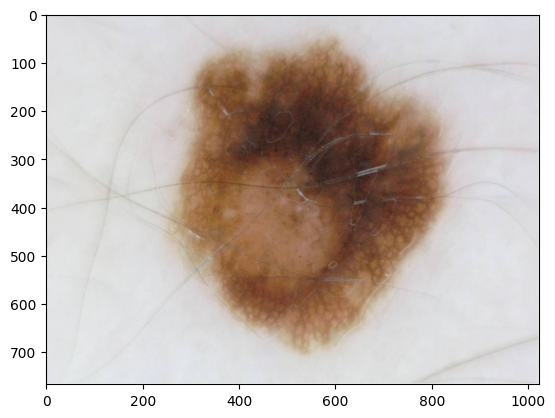

In [59]:
plt.imshow(img_skin)

In [60]:
img_skin.shape

(767, 1022, 3)

In [61]:
img_skin_grtruth = plt.imread("Image_skin003_GrTruth.png")

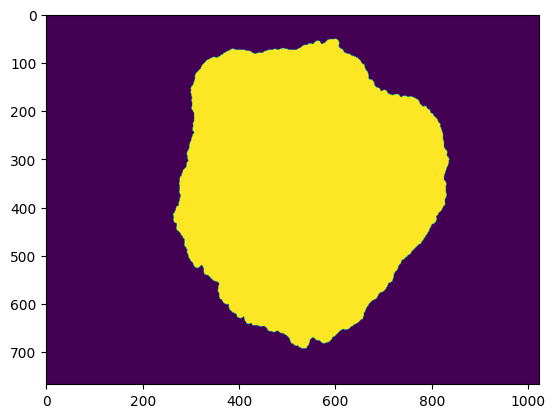

In [62]:
plt.imshow(img_skin_grtruth)

In [63]:
img_skin_grtruth.shape

(767, 1022)

# Part 1

In [64]:
img_skin_gray = cv2.cvtColor(img_skin, cv2.COLOR_BGR2GRAY)

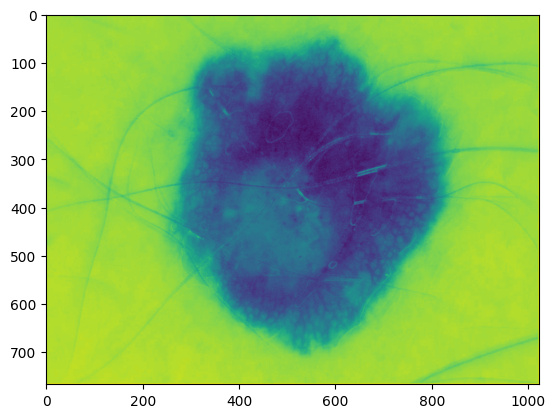

In [65]:
plt.imshow(img_skin_gray)

In [66]:
img_skin_gray.shape

(767, 1022)

<Axes: ylabel='Count'>

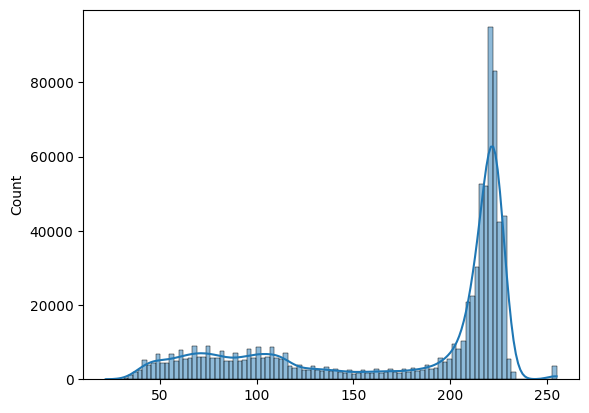

In [67]:
sns.histplot(data=img_skin_gray.flatten(),kde=True)

In [68]:
thresh,mask = cv2.threshold(img_skin_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [69]:
thresh

151.0

In [70]:

unique_values, counts = np.unique(img_skin_gray, return_counts=True)

In [71]:
total = counts.sum()

In [72]:
# Global mean
global_mean = 0
for i,p in zip(unique_values,counts):
  global_mean = global_mean + (i*(p/total))

In [73]:
global_mean

175.6524517971001

In [74]:
global_variance = 0
for i, p in zip(unique_values,counts):
  global_variance = global_variance + ((i-global_mean)**2)*(p/total)

In [75]:
global_variance

3908.5503410661536

In [76]:
# prob of 151
prob = 0
for i, p in zip(unique_values,counts):
  if i > thresh:
    break
  prob = prob + p

prob = prob / total

In [77]:
prob

0.31083949716408504

In [78]:
# mean of 151
mean = 0
for i, p in zip(unique_values,counts):
  if i > thresh:
    break
  mean = mean + (i*(p/total))

In [79]:
mean

27.183865008917248

In [80]:
# variance

variance = ((global_mean*prob-mean)**2)/(prob*(1-prob))

In [81]:
variance

3508.70620708151

In [82]:
# Separability measure
sep_measure = variance/global_variance

In [83]:
sep_measure

0.8977001447867814

# Part 2

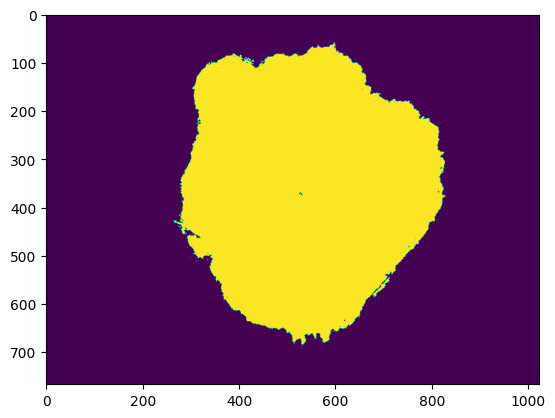

In [84]:
mask = np.invert(mask)
plt.imshow(mask)

# Part 3

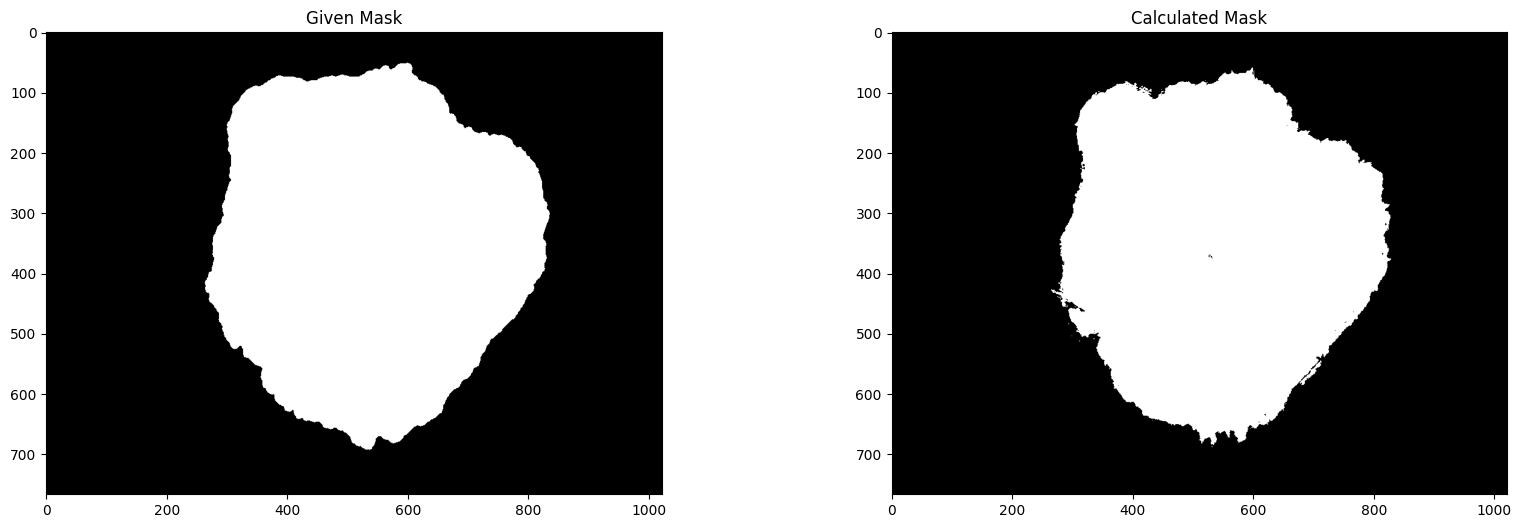

In [85]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.title("Given Mask")
plt.imshow(img_skin_grtruth,cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Calculated Mask")
plt.imshow(mask,cmap='gray')
plt.show()

In [87]:
accuracy_score(img_skin_grtruth.flatten(),mask.flatten())

0.6674044553078684

In [90]:
jaccard_score(img_skin_grtruth.flatten(),mask.flatten(),average="micro")

0.5008304717558231